In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/Users/anishasachdeva/Desktop/Git Projects/student_performance/jupyter_notebook/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.duplicated().sum()
# No duplicates in the db

np.int64(0)

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# Inference
# For all the Discrete Numerical Variables, all means are very close to each other - between 66 and 68.05;
# All standard deviations are also close - between 14.6 and 15.19;
# While there is a minimum score 0 for math, for writing minimum is higher as 10 and for reading is also higher as 17

In [9]:
# Explorartory Data Analysis (EDA)

# Nominal Variables - gender, race/ethnicity,lunch , test preparation course
# Ordinal Variables - parental level of education
# Discrete Numerical Variables - math score, reading score, writing score

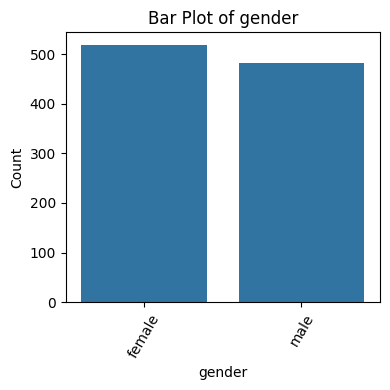

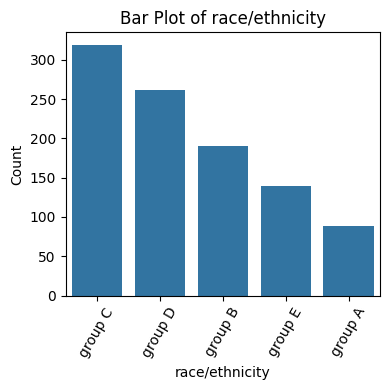

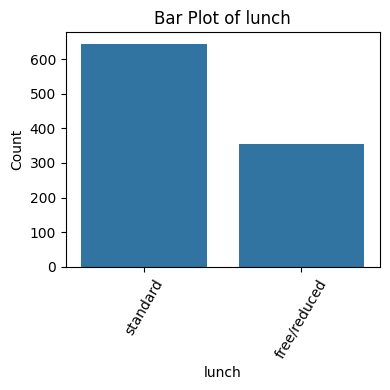

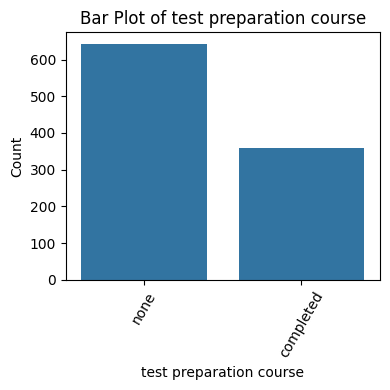

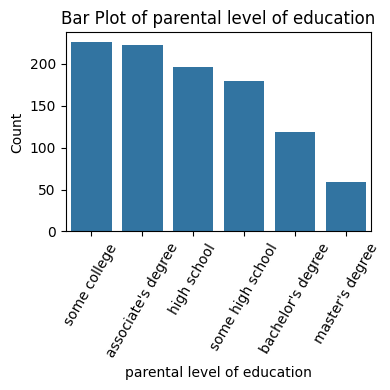

In [10]:
#Bar chart for Nominal and Ordinal Variables
def plot_bargraph(df, columns):
    for column in columns:
        plt.figure(figsize=(4, 4))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=60)  # Rotate x labels for better readability
        plt.tight_layout()  # Adjust plot to fit into the figure area
        plt.show()

nominal_columns = ['gender', 'race/ethnicity', 'lunch' , 'test preparation course']


ordinal_columns = ['parental level of education']



plot_bargraph(df, nominal_columns)
plot_bargraph(df, ordinal_columns)

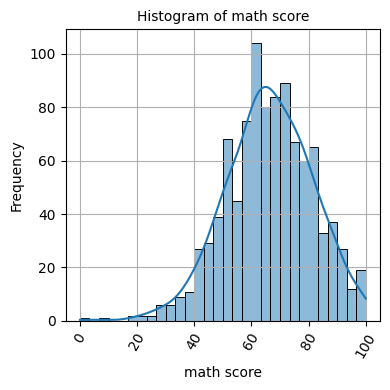

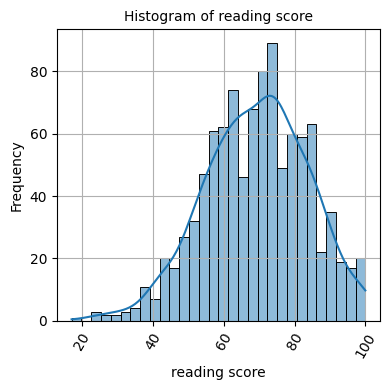

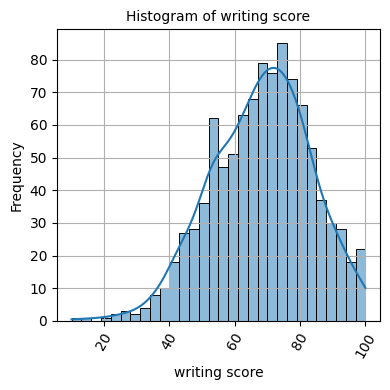

In [11]:
#Histogram for Discrete Numerical Variables

def plot_histogram(df, columns):
    for column in columns:
        plt.figure(figsize=(4, 4))
        sns.histplot(data=df, x= column, bins=30 ,kde=True)
        plt.title(f'Histogram of {column}',fontsize=10)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)  # Rotate x labels for better readability
        plt.grid(True)
        plt.tight_layout()  # Adjust plot to fit into the figure area
        plt.show()
    
discrete_numerical_variables = ['math score', 'reading score', 'writing score']
plot_histogram(df, discrete_numerical_variables)

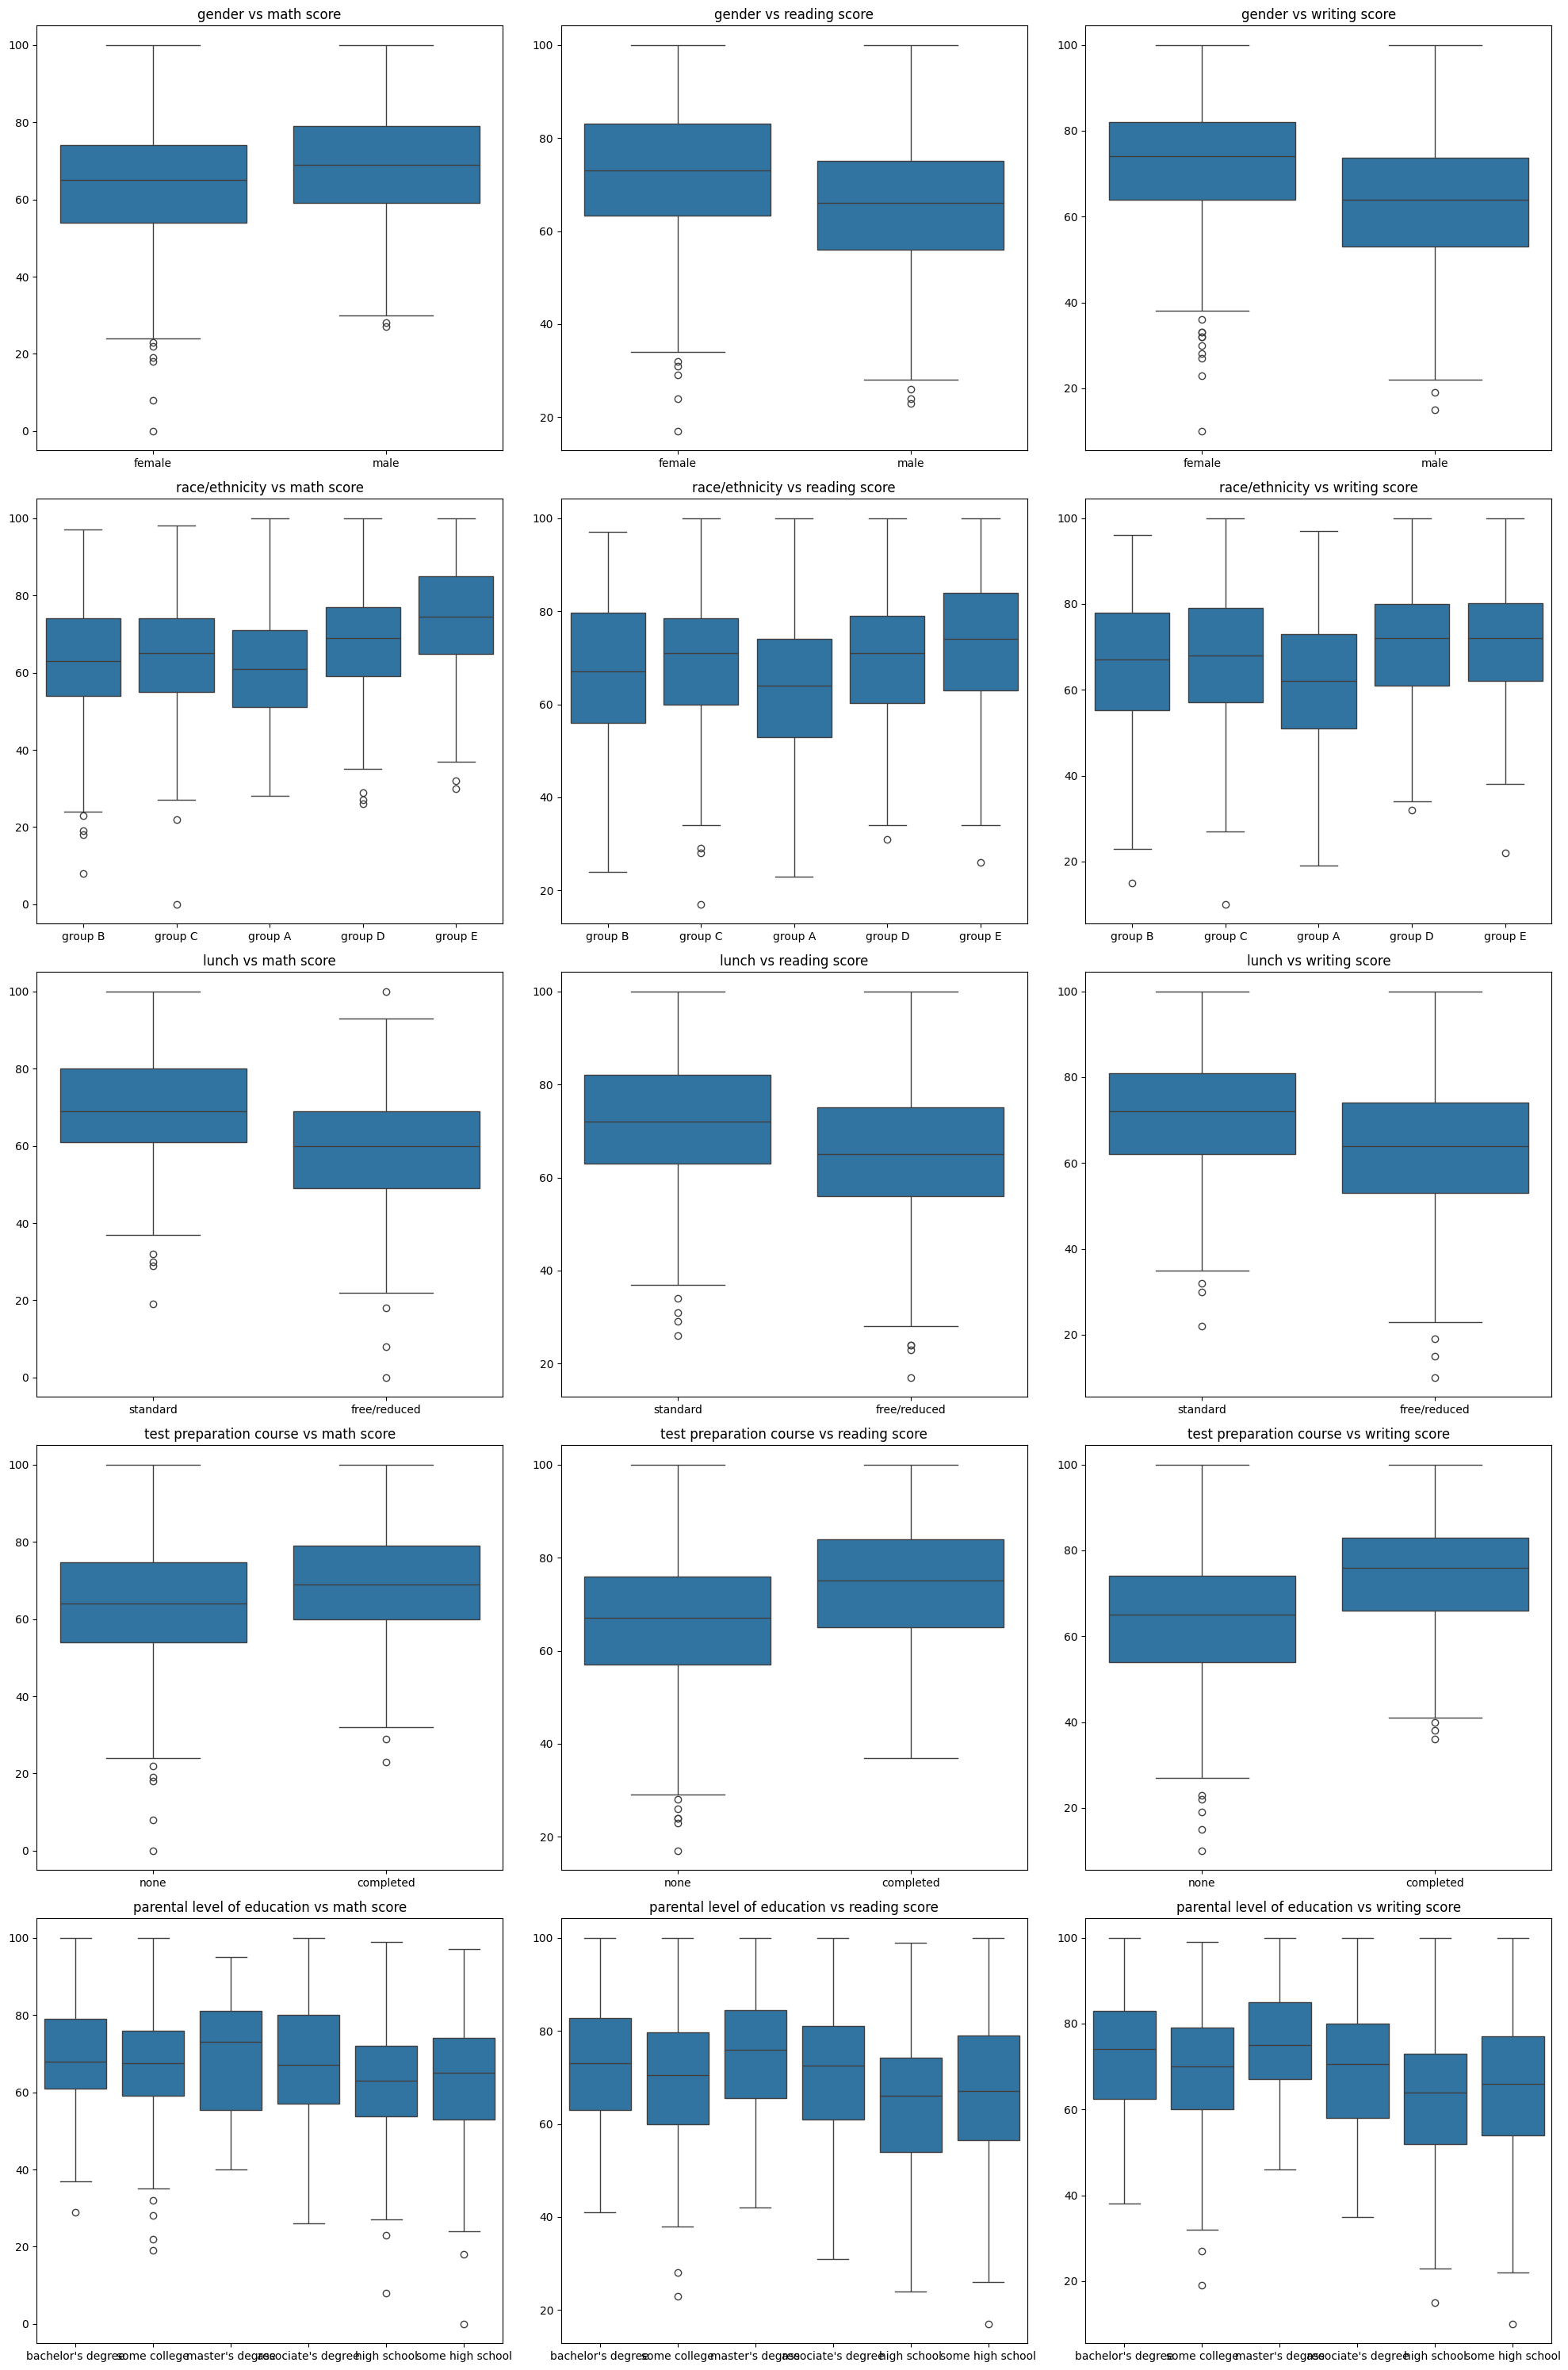

In [12]:
# Exploring Relationships with Categorical Variables
# Bivariate Analysis 
# Does gender has any impact on student's performance?
# Does race/ethnicity has any impact on student's performance?
# Does lunch has any impact on student's performance?
# Does test preparation course has any impact on student's performance?
# Does parental level of education has any impact on student's performance?

categorical_variables= ['gender', 'race/ethnicity', 'lunch' , 'test preparation course', 'parental level of education']

discrete_numerical_variables = ['math score', 'reading score', 'writing score']

num_categorical = len(categorical_variables)
num_numerical = len(discrete_numerical_variables)

fig, axes = plt.subplots(nrows=num_categorical, ncols=num_numerical, figsize=(20, 30))


for i, cat_var in enumerate(categorical_variables):
    for j, num_var in enumerate(discrete_numerical_variables):
        sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{cat_var} vs {num_var}', fontsize=12)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')


plt.tight_layout()
plt.show()


In [13]:
# Female students scored better than male students in reading and writing. However, males outperformed females in maths. 
# The average marks scored by students of group E is highest among all the groups while the average marks scored by students of group A is lowest.
# Student who got standard lunch performed better. Hence, nutrition is an important factor here.
# Those who completed the test preparation for the course performed better.
# No direct relation between how the child is performing and how educated the parents are.

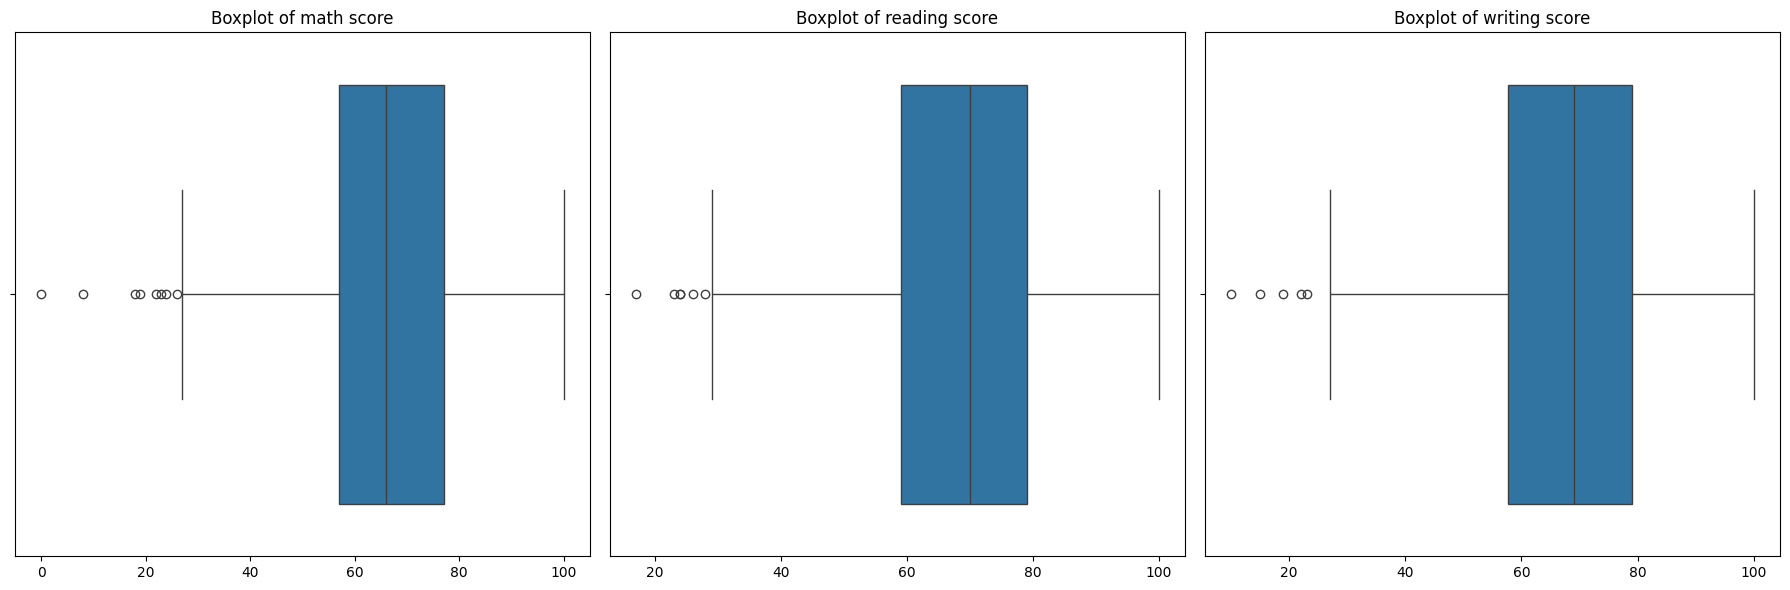

In [14]:
discrete_numerical_variables = ['math score', 'reading score', 'writing score']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i, col in enumerate(discrete_numerical_variables):
    sns.boxplot(data=df, x=col, ax=axes[i])

    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')



plt.tight_layout()
plt.show()

In [15]:
#Outliers Treatment for numercial data i.e. math score, reading score, writing score
q1_math = np.percentile(df['math score'],25)
q3_math = np.percentile(df['math score'],75)
iqr_math = q3_math-q1_math
lower_fence_math = q1_math - (1.5 * iqr_math)
higher_fence_math = q3_math + (1.5 * iqr_math)

df = df[df['math score'] > lower_fence_math]
df.shape

(990, 8)

<Axes: xlabel='math score'>

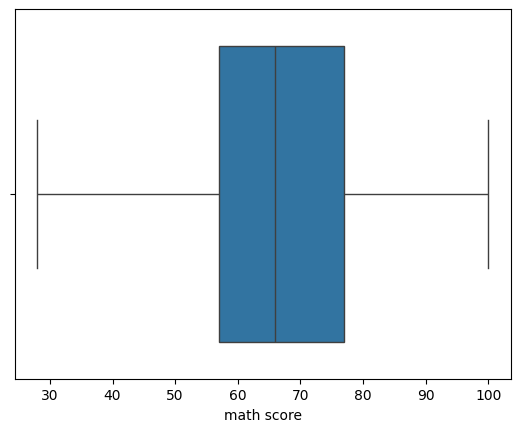

In [16]:
sns.boxplot(data=df, x='math score')

In [17]:
q1_reading = np.percentile(df['reading score'],25)
q3_reading = np.percentile(df['reading score'],75)
iqr_reading = q3_reading-q1_reading
lower_fence_reading = q1_reading - (1.5 * iqr_math)
higher_fence_reading = q3_reading + (1.5 * iqr_math)

df = df[df['reading score'] > lower_fence_reading]
df.shape

(984, 8)

<Axes: xlabel='reading score'>

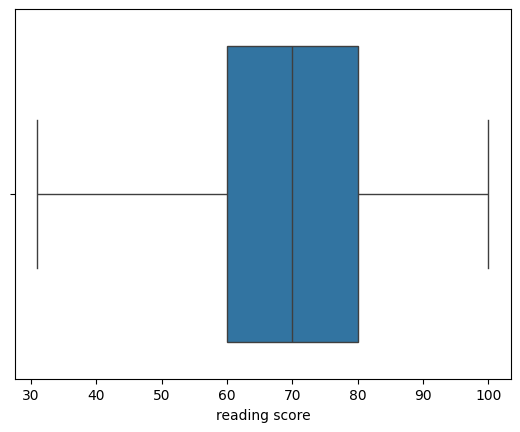

In [18]:
sns.boxplot(data=df, x='reading score')

In [19]:
q1_writing = np.percentile(df['writing score'],25)
q3_writing = np.percentile(df['writing score'],75)
iqr_writing = q3_writing-q1_writing
lower_fence_writing = q1_writing - (1.5 * iqr_writing)
higher_fence_writing = q3_writing + (1.5 * iqr_writing)

df = df[df['writing score'] > lower_fence_writing]
df.shape

(984, 8)

<Axes: xlabel='writing score'>

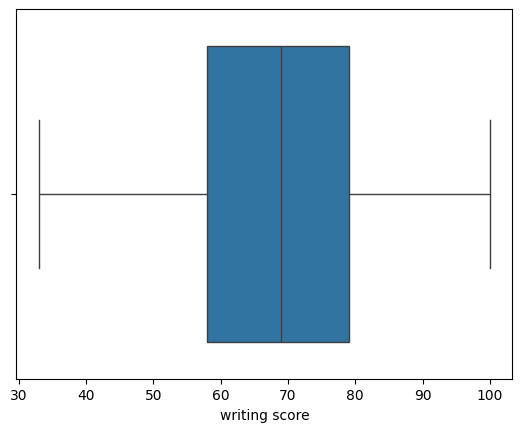

In [20]:
sns.boxplot(data=df, x='writing score')

In [23]:
#Split the data
X = df.drop(columns=['math score'])
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Binary Encoding for Gender, Lunch, and Test Preparation Course
def binary_encoding(df):
    df['gender'] = df['gender'].map({'female': 0, 'male': 1})
    df['lunch'] = df['lunch'].map({'standard': 0, 'free/reduced': 1})
    df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})
    return df

X_train = binary_encoding(X_train)
X_test = binary_encoding(X_test)

In [26]:
# Ordinal Encoding for Parental Level of Education
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Fit and transform on training data
X_train['parental level of education'] = ordinal_encoder.fit_transform(X_train[['parental level of education']])
# Transform test data
X_test['parental level of education'] = ordinal_encoder.transform(X_test[['parental level of education']])

In [31]:
# One-Hot Encoding for Race/Ethnicity
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform on training data
X_train_encoded = one_hot_encoder.fit_transform(X_train[['race/ethnicity']])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['race/ethnicity']))
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df], axis=1).drop(columns=['race/ethnicity'])

# Transform test data
X_test_encoded = one_hot_encoder.transform(X_test[['race/ethnicity']])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(['race/ethnicity']))
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df], axis=1).drop(columns=['race/ethnicity'])


In [32]:
# Datasets are ready for model training
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
knn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
ada = AdaBoostRegressor()


regressors = [
    ('Linear Regression',lin_reg),
    ('Lasso', lasso),
    ('Ridge', ridge),
    ('K-Neighbors Regressor', knn),
    ('Decision Tree', dtr),
    ('Random Forest Regressor', rfr),
    ('XGBRegressor', xgb),
    ('AdaBoost Regressor',ada)
]

results = {}

for name, reg in regressors:
    reg.fit(X_train, y_train)  
    y_pred = reg.predict(X_test)         
    
    
    # Metrics for regression
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = [r2, mae, mse, rmse]
    
    print(f"Model: {name}")
    print("R² Score:", r2)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("-" * 50)
    
results_df = pd.DataFrame(results, index=['R² Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']).T
print(results_df)


Model: Linear Regression
R² Score: 0.8478376468624385
Mean Absolute Error: 4.29040897050024
Mean Squared Error: 29.90889474786367
Root Mean Squared Error: 5.4689025176779
--------------------------------------------------
Model: Lasso
R² Score: 0.78513770848664
Mean Absolute Error: 5.181608085967168
Mean Squared Error: 42.233138024280116
Root Mean Squared Error: 6.498702795503124
--------------------------------------------------
Model: Ridge
R² Score: 0.8475697530313832
Mean Absolute Error: 4.2935369448041
Mean Squared Error: 29.96155171741903
Root Mean Squared Error: 5.473714617827553
--------------------------------------------------
Model: K-Neighbors Regressor
R² Score: 0.6479368327936298
Mean Absolute Error: 6.621319796954316
Mean Squared Error: 69.20121827411167
Root Mean Squared Error: 8.318726962348967
--------------------------------------------------
Model: Decision Tree
R² Score: 0.6748630290884083
Mean Absolute Error: 6.355329949238579
Mean Squared Error: 63.90862944162436